# Preliminary Modelling

In [1]:
import random
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Model 1

Then to set up the variables for the model. In this first example the populations have an initial value of 100, and a decay rate of 1%. For each enzyme there is a chance that it will combine with a circle or a triangle at each step.

In [2]:
# Initializing the simulation size
number_of_steps = 1000
circle_population = np.zeros(number_of_steps)
triangle_population = np.zeros(number_of_steps)

# Defining the inital population
circle_population[0] = 100
triangle_population[0] = 100

# The chance a protein will combine with an enzyme
triangle_chance = 0.2
circle_chance = 0.1

# How many proteins are produced each step
circle_production = 2
triangle_production = 3

enzyme_population = 10
decay_rate = 0.005

def triangle(triangle_production):
    return triangle_production



for i in range(1, number_of_steps):
    triangle_population[i] = max(
        0, triangle_population[i-1]*(1-decay_rate) + triangle_production
    )
    circle_population[i] = max(0, circle_population[i-1]*(1-decay_rate) + circle_production)
    for _ in range(0, enzyme_population):
        chance = random.random()

        if 0 <= chance < circle_chance and circle_population[i] >= 1:
            circle_population[i] = circle_population[i] - 1
        elif circle_chance <= chance < triangle_chance + circle_chance and triangle_population[i] >= 1:
            triangle_population[i] = triangle_population[i] - 1
        else:
            pass

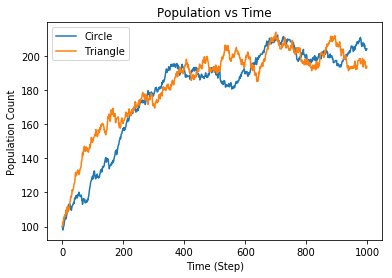

In [3]:
plt.plot(np.arange(0, number_of_steps), circle_population)
plt.plot(np.arange(0, number_of_steps), triangle_population)
plt.title("Population vs Time")
plt.legend(["Circle", "Triangle"])
plt.xlabel("Time (Step)")
plt.ylabel("Population Count")
plt.show()

## Model 2

The enzyme will now have production and decay

In [4]:
# Initializing the simulation size
number_of_steps = 1000
circle_population = np.zeros(number_of_steps)
triangle_population = np.zeros(number_of_steps)
enzyme_population = np.zeros(number_of_steps)

# Defining the inital population
circle_population[0] = 100
triangle_population[0] = 100
enzyme_population[0] = 10

# The chance a protein will combine with an enzyme
triangle_chance = 0.2
circle_chance = 0.1

# How many proteins are produced each step
circle_production = 2
triangle_production = 4

enzyme_production_factor = 0.4
enzyme_decay_factor = 0.3
decay_rate = 0.005

for i in range(1, number_of_steps):
    triangle_population[i] = max(
        0, triangle_population[i-1]*(1-decay_rate) + triangle_production
    )
    circle_population[i] = max(0, circle_population[i-1]*(1-decay_rate) + circle_production)
    enzyme_population[i] = max(
        0, enzyme_population[i-1]*enzyme_decay_factor+(circle_population[i-1]+triangle_population[i-1])*enzyme_production_factor
    )

    for _ in range(0, math.floor(enzyme_population[i])):
        chance = random.random()

        if 0 <= chance < circle_chance and circle_population[i] >= 1:
            circle_population[i] = circle_population[i] - 1
        elif circle_chance <= chance < triangle_chance + circle_chance and triangle_population[i] >= 1:
            triangle_population[i] = triangle_population[i] - 1
        else:
            pass

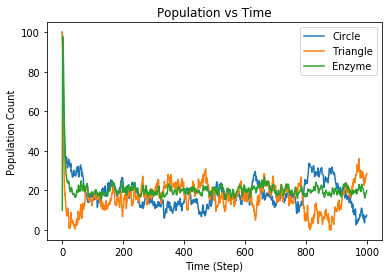

In [5]:
plt.plot(np.arange(0, number_of_steps), circle_population)
plt.plot(np.arange(0, number_of_steps), triangle_population)
plt.plot(np.arange(0, number_of_steps), enzyme_population)
plt.title("Population vs Time")
plt.legend(["Circle", "Triangle", "Enzyme"])
plt.xlabel("Time (Step)")
plt.ylabel("Population Count")
plt.show()

## Model 3

The protein populations now have periodic productions

In [6]:
# Initializing the simulation size
number_of_steps = 1000
circle_population = np.zeros(number_of_steps)
triangle_population = np.zeros(number_of_steps)
enzyme_population = np.zeros(number_of_steps)

# Defining the inital population
circle_population[0] = 100
triangle_population[0] = 100
enzyme_population[0] = 10

# The chance a protein will combine with an enzyme
triangle_chance = 0.3
circle_chance = 0.3

# How many proteins are produced each step
circle_production = 7
triangle_production = 7
w1 = 2*math.pi
w2 = 4*math.pi/30

enzyme_production_factor = 0.4
enzyme_decay_factor = 0.3
decay_rate = 0.005

for i in range(1, number_of_steps):
    triangle_population[i] = max(
        0, triangle_population[i-1]*(1-decay_rate) + triangle_production*(1+math.sin(w2*i))
    )
    circle_population[i] = max(
        0, circle_population[i-1]*(1-decay_rate) + circle_production*(1+math.sin(w1*i))
    )
    enzyme_population[i] = max(
        0, enzyme_population[i-1]*enzyme_decay_factor+(circle_population[i-1]+triangle_population[i-1])*enzyme_production_factor
    )

    for _ in range(0, math.floor(enzyme_population[i])):
        chance = random.random()

        if 0 <= chance < circle_chance and circle_population[i] >= 1:
            circle_population[i] = circle_population[i] - 1
        elif circle_chance <= chance < triangle_chance + circle_chance and triangle_population[i] >= 1:
            triangle_population[i] = triangle_population[i] - 1
        else:
            pass

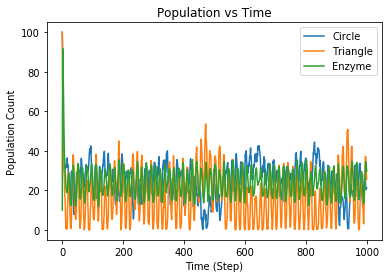

In [7]:
plt.plot(np.arange(0, number_of_steps), circle_population)
plt.plot(np.arange(0, number_of_steps), triangle_population)
plt.plot(np.arange(0, number_of_steps), enzyme_population)
plt.title("Population vs Time")
plt.legend(["Circle", "Triangle", "Enzyme"])
plt.xlabel("Time (Step)")
plt.ylabel("Population Count")
plt.show()